In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
print(os.listdir("./CMAPSSData"))

['Damage Propagation Modeling.pdf', 'readme.txt', 'RUL_FD001.txt', 'RUL_FD002.txt', 'RUL_FD003.txt', 'RUL_FD004.txt', 'test_FD001.txt', 'test_FD002.txt', 'test_FD003.txt', 'test_FD004.txt', 'train_FD001.txt', 'train_FD002.txt', 'train_FD003.txt', 'train_FD004.txt']


In [2]:
np.random.seed(1234)  
PYTHONHASHSEED = 0

In [3]:
train= pd.read_csv('./CMAPSSData/train_FD001.txt', sep=" ", header=None)
test = pd.read_csv('./CMAPSSData/test_FD001.txt', sep=" ", header=None)
print("train shape: ", train.shape, "test shape: ", test.shape)

train shape:  (20631, 28) test shape:  (13096, 28)


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       20631 non-null  int64  
 1   1       20631 non-null  int64  
 2   2       20631 non-null  float64
 3   3       20631 non-null  float64
 4   4       20631 non-null  float64
 5   5       20631 non-null  float64
 6   6       20631 non-null  float64
 7   7       20631 non-null  float64
 8   8       20631 non-null  float64
 9   9       20631 non-null  float64
 10  10      20631 non-null  float64
 11  11      20631 non-null  float64
 12  12      20631 non-null  float64
 13  13      20631 non-null  float64
 14  14      20631 non-null  float64
 15  15      20631 non-null  float64
 16  16      20631 non-null  float64
 17  17      20631 non-null  float64
 18  18      20631 non-null  float64
 19  19      20631 non-null  float64
 20  20      20631 non-null  float64
 21  21      20631 non-null  int64  
 22

In [5]:
# Удалим сенсоры с пропущенными значениями
train.drop(train.columns[[26, 27]], axis=1, inplace=True)
test.drop(test.columns[[26, 27]], axis=1, inplace=True)

In [6]:
# Обработка входных данных
target_var = ['RUL']
index_columns_names =  ["Unit_Number", "Time_in_cycles"]
op_columns = ["Operational_Setting_"+str(i) for i in range(1,4)]
sensor_columns =["Sensor_"+str(i) for i in range(1,22)]
column_names = index_columns_names + op_columns + sensor_columns
print(column_names)

['Unit_Number', 'Time_in_cycles', 'Operational_Setting_1', 'Operational_Setting_2', 'Operational_Setting_3', 'Sensor_1', 'Sensor_2', 'Sensor_3', 'Sensor_4', 'Sensor_5', 'Sensor_6', 'Sensor_7', 'Sensor_8', 'Sensor_9', 'Sensor_10', 'Sensor_11', 'Sensor_12', 'Sensor_13', 'Sensor_14', 'Sensor_15', 'Sensor_16', 'Sensor_17', 'Sensor_18', 'Sensor_19', 'Sensor_20', 'Sensor_21']


In [7]:
train.columns = column_names
test.columns = column_names
train.head(5)

,Unit_Number,Time_in_cycles,Operational_Setting_1,Operational_Setting_2,Operational_Setting_3,Sensor_1,Sensor_2,Sensor_3,Sensor_4,Sensor_5,...,Sensor_12,Sensor_13,Sensor_14,Sensor_15,Sensor_16,Sensor_17,Sensor_18,Sensor_19,Sensor_20,Sensor_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [8]:
# Найдём последний цикл для каждого двигателя
max_cycle = train.groupby('Unit_Number')['Time_in_cycles'].max().reset_index()
max_cycle.columns = ['Unit_Number', 'Max_of_cycle']

In [9]:
train_merged = train.merge(max_cycle, left_on='Unit_Number', right_on='Unit_Number', how='inner')

In [10]:
# Рассчитаем RUL для каждой строки
RUL = train_merged["Max_of_cycle"] - train_merged["Time_in_cycles"]
train_with_target = train_merged["RUL"] = RUL

In [11]:
train_with_target = train_merged.drop("Max_of_cycle", axis=1)
train_with_target.head(5)

,Unit_Number,Time_in_cycles,Operational_Setting_1,Operational_Setting_2,Operational_Setting_3,Sensor_1,Sensor_2,Sensor_3,Sensor_4,Sensor_5,...,Sensor_13,Sensor_14,Sensor_15,Sensor_16,Sensor_17,Sensor_18,Sensor_19,Sensor_20,Sensor_21,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187


In [24]:
font = {'weight' : 'bold',
        'size'   : 14}

plt.rc('font', **font)

In [18]:
import matplotlib.pylab as pylab
params = {'axes.titlesize':'x-large',
         'axes.titleweight':'normal'}

pylab.rcParams.update(params)

In [19]:
plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"

# Отбор признаков

In [144]:
train_with_target['Sensor_8'] = train_with_target['Sensor_8'].astype('int')

In [16]:
sns.set(font_scale=1.3)

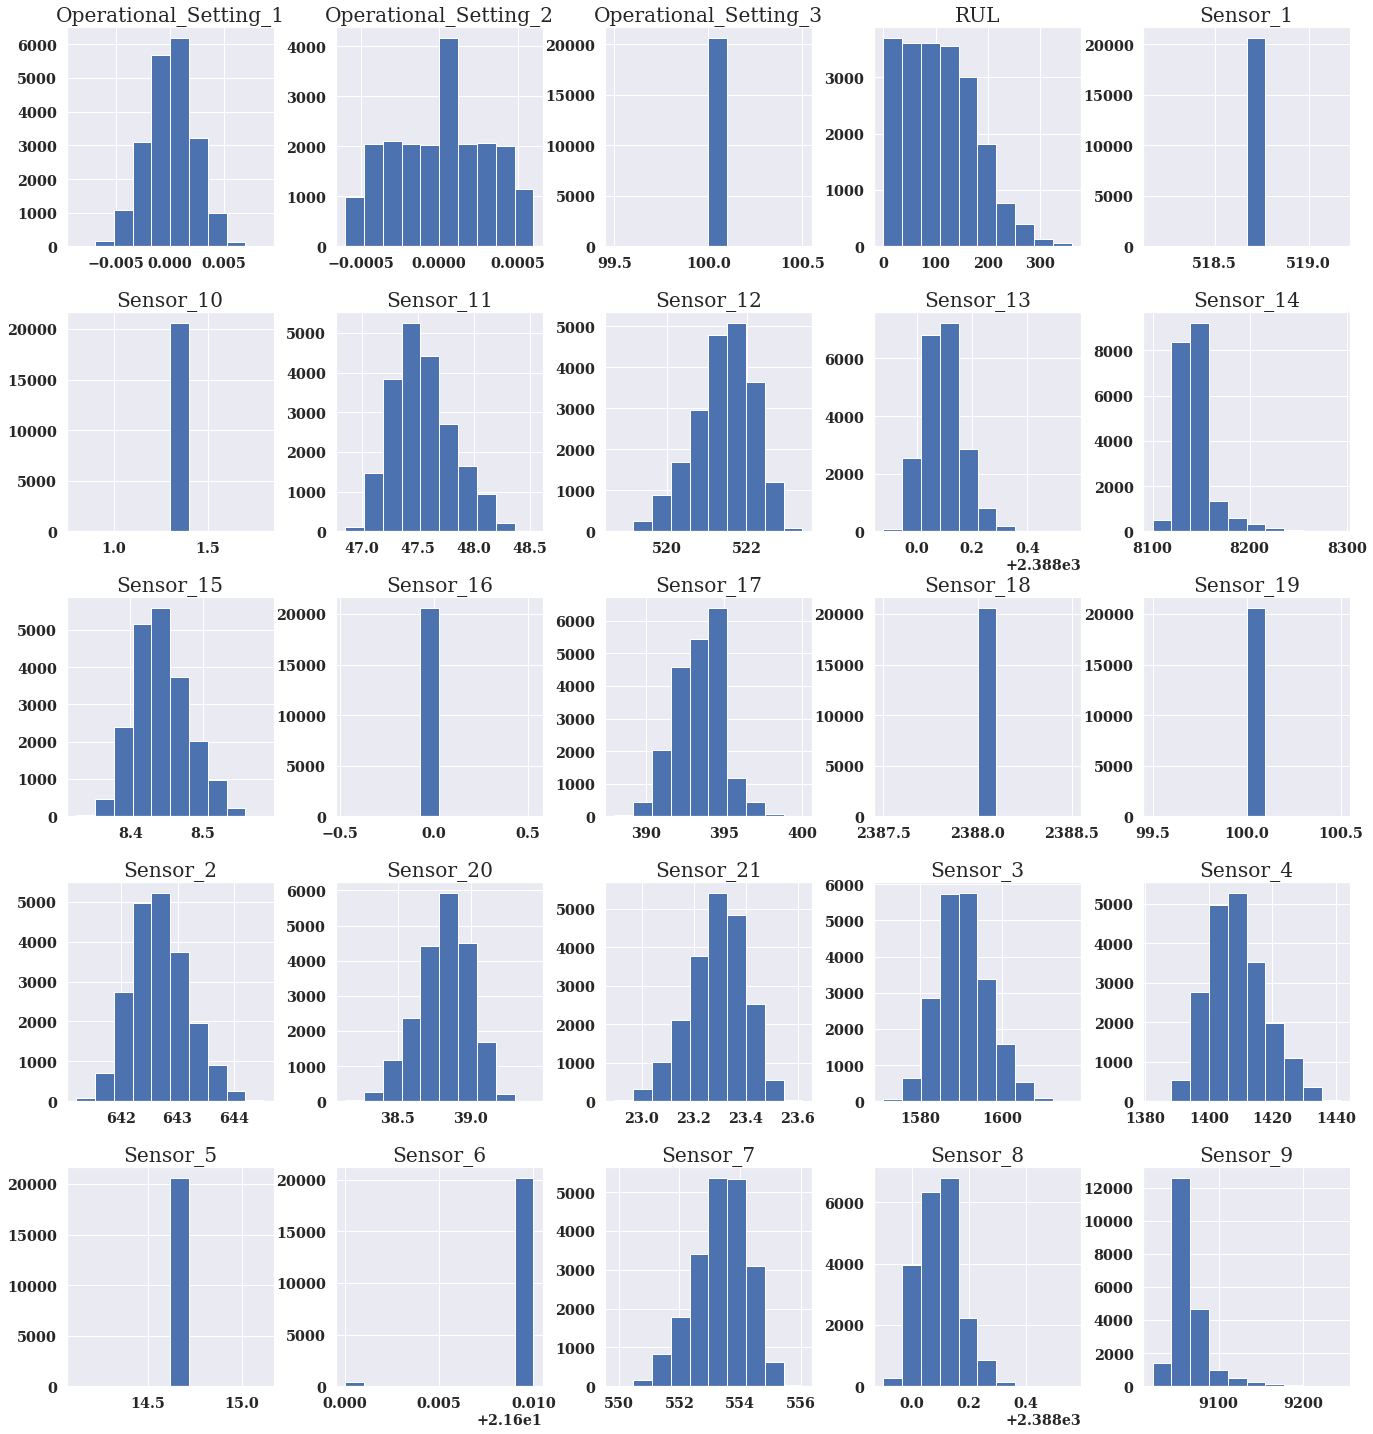

In [25]:
train_with_target.drop(['Unit_Number', 'Time_in_cycles'], axis=1).hist(figsize=(23, 25))
plt.show()

In [13]:
train_with_target.columns

Index(['Unit_Number', 'Time_in_cycles', 'Operational_Setting_1',
       'Operational_Setting_2', 'Operational_Setting_3', 'Sensor_1',
       'Sensor_2', 'Sensor_3', 'Sensor_4', 'Sensor_5', 'Sensor_6', 'Sensor_7',
       'Sensor_8', 'Sensor_9', 'Sensor_10', 'Sensor_11', 'Sensor_12',
       'Sensor_13', 'Sensor_14', 'Sensor_15', 'Sensor_16', 'Sensor_17',
       'Sensor_18', 'Sensor_19', 'Sensor_20', 'Sensor_21', 'RUL'],
      dtype='object')

In [14]:
train_without_const = train_with_target.drop(['Operational_Setting_3', 'Sensor_1', 'Sensor_5', 'Sensor_6', 'Sensor_10', 'Sensor_16', 'Sensor_18', 'Sensor_19'], axis=1)

### Марица корреляций

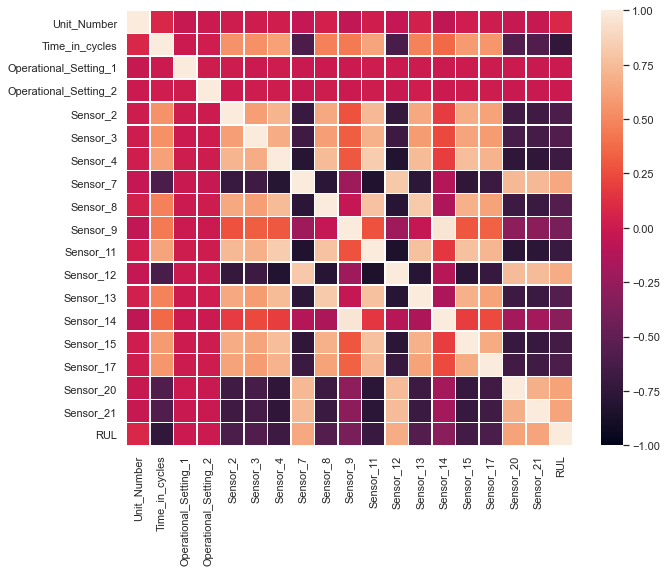

In [15]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(train_without_const.corr(), linewidths=.5, vmin=-1, vmax=1)

### Показания датчиков

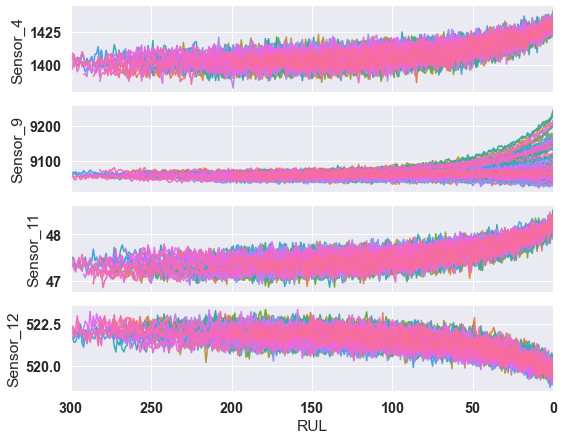

In [107]:
sns.set(font_scale=1.3)
var_to_use = ['Sensor_4', 'Sensor_9', 'Sensor_11', 'Sensor_12']#list(set(train_without_const.columns) - set(['Unit_Number', 'Time_in_cycles', 'RUL']))
explore = sns.PairGrid(data=train_without_const,
                 x_vars=target_var,
                 y_vars=var_to_use,
                 hue="Unit_Number", height=1.5, aspect=5)
explore = explore.map(plt.plot)
explore = explore.set(xlim=(300,0))


### Отбор признаков с помощью случайного леса

In [17]:
print(train_without_const.shape)
vars_to_drop = ['Unit_Number', 'Time_in_cycles', 'Operational_Setting_1', 'Operational_Setting_2']  
train_only_sensor = train_without_const.drop(vars_to_drop, axis = 1)
print(train_only_sensor.shape)

(20631, 19)
(20631, 15)


In [23]:
X = train_only_sensor.drop(['RUL'], axis = 1)
y = train_only_sensor['RUL']

In [19]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor()
random_forest.fit(X, y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [20]:
important_features = pd.Series(data=random_forest.feature_importances_,index=X.columns)
important_features.sort_values(ascending=False,inplace=True)
print(important_features.head(10))

Sensor_11    0.432667
Sensor_9     0.128535
Sensor_4     0.097173
Sensor_12    0.048202
Sensor_14    0.040013
Sensor_7     0.039845
Sensor_15    0.036439
Sensor_21    0.034483
Sensor_3     0.031678
Sensor_2     0.030135
dtype: float64


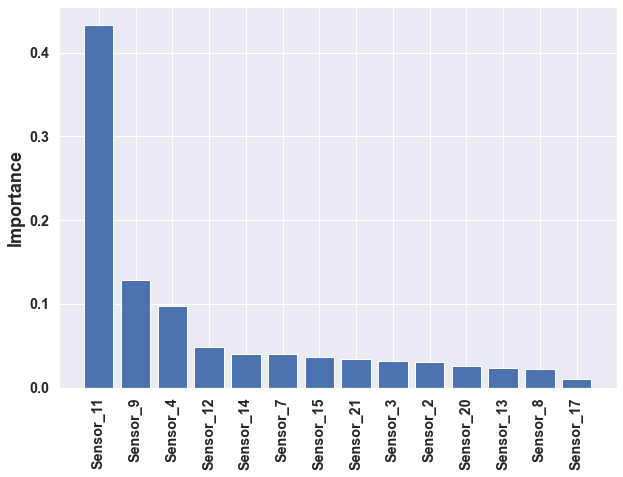

In [109]:
f, ax = plt.subplots(figsize=(10, 7))
plt.bar(important_features.index, important_features.values)
plt.ylabel("Importance", fontsize = 18, weight='bold')
plt.xticks(important_features.index, rotation='vertical')
plt.show()

# Обучение модели

In [82]:
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
scaler = preprocessing.StandardScaler()
scaler.fit(X)
X_scale = scaler.transform(X)

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.2, random_state=1234)

param = {
    'min_samples_leaf': [2, 10, 25, 50, 100],
    'max_depth': [10, 20, 30],
    'n_estimators':[100]
}

grid_random_forest = GridSearchCV(estimator=RandomForestRegressor()
                            , cv=5
                            , param_grid = param
                            , scoring = 'neg_mean_squared_error'
                            , n_jobs = -1
                           )
grid_random_forest.fit(X_train, y_train)

print(grid_random_forest.best_estimator_)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred = grid_random_forest.predict(X_test)
print("Random Forest Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("Random Forest Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
print("Random Forest r-squared: ", r2_score(y_test, y_pred))

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=10,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
Random Forest Mean Squared Error:  1722.419146464528
Random Forest Mean Absolute Error:  29.657963701780325
Random Forest r-squared:  0.635557819646047


In [89]:
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.2, random_state=1234)

grid_LinearRegression = GridSearchCV(estimator=LinearRegression()
                            , cv=5
                            , param_grid = {'normalize':[False, True]}
                            , scoring = 'neg_mean_squared_error'
                            , n_jobs = -1
                           )
grid_LinearRegression.fit(X_train, y_train)
print(grid_LinearRegression.best_estimator_)

y_pred = grid_LinearRegression.predict(X_test)
print("Linea Regression Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("Linear Regression Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
print("Linear Regression r-squared: ", r2_score(y_test, y_pred))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Linea Regression Mean Squared Error:  2017.6441627653255
Linear Regression Mean Absolute Error:  34.508583248149144
Linear Regression r-squared:  0.573091927498633


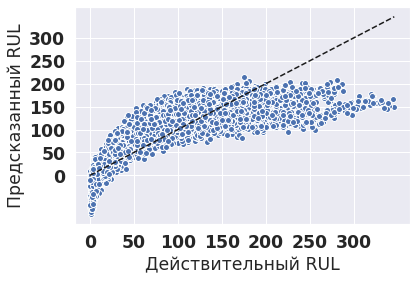

In [90]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(1, 1, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
ax.set_xlabel('Действительный RUL')
ax.set_ylabel('Предсказанный RUL')
plt.xticks([0, 50, 100, 150, 200, 250, 300])
plt.yticks([0, 50, 100, 150, 200, 250, 300])
plt.show()

In [91]:
from sklearn.svm import SVR
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.2, random_state=1234)

param = {
    'C': [1, 1.1],
    'epsilon': [.05, .1, .15]
}

grid_SVR = GridSearchCV(estimator=SVR()
                            , cv=5
                            , param_grid = param
                            , scoring = 'neg_mean_squared_error'
                            , n_jobs = -1
                           )

grid_SVR.fit(X_train, y_train)
print(grid_SVR.best_estimator_)

y_pred = grid_SVR.predict(X_test)
print("SVR Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("SVR Error: ", mean_absolute_error(y_test, y_pred))
print("SVR r-squared: ", r2_score(y_test, y_pred))

SVR(C=1.1, cache_size=200, coef0=0.0, degree=3, epsilon=0.15, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
SVR Mean Squared Error:  1803.9216082912462
SVR Error:  29.755067149226317
SVR r-squared:  0.6183129260594233


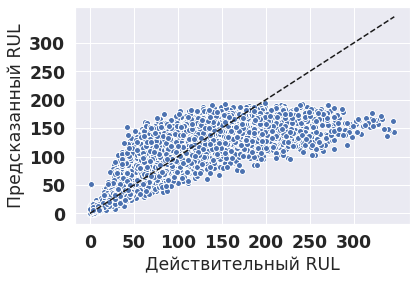

In [95]:
y_pred = grid_SVR.predict(X_test)
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(1, 1, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xticks([0, 50, 100, 150, 200, 250, 300])
plt.yticks([0, 50, 100, 150, 200, 250, 300])
ax.set_xlabel('Действительный RUL')
ax.set_ylabel('Предсказанный RUL')
plt.show()

# RUL

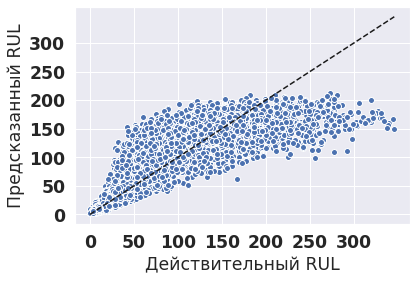

In [94]:
y_pred = grid_random_forest.predict(X_test)
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(1, 1, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
ax.set_xlabel('Действительный RUL')
ax.set_ylabel('Предсказанный RUL')
plt.xticks([0, 50, 100, 150, 200, 250, 300])
plt.yticks([0, 50, 100, 150, 200, 250, 300])
plt.show()

# Тестирование: только последнее состояние

In [301]:
# Найдём последний цикл для каждого двигателя
max_cycle = test.groupby('Unit_Number')['Time_in_cycles'].max()

In [302]:
test_max_cycle = pd.DataFrame()
test_max_cycle['Unit_Number'] = max_cycle.index
test_max_cycle['Time_in_cycles'] = max_cycle.values
test_max_cycle['Max_of_cycles'] = max_cycle.values

In [303]:
test_max_cycle

,Unit_Number,Time_in_cycles,Max_of_cycles
0,1,31,31
1,2,49,49
2,3,126,126
3,4,106,106
4,5,98,98
...,...,...,...
95,96,97,97
96,97,134,134
97,98,121,121
98,99,97,97


In [304]:
test_merged = test.merge(test_max_cycle, left_on=['Unit_Number', 'Time_in_cycles'], right_on=['Unit_Number', 'Time_in_cycles'], how='inner')

In [305]:
test_merged.head()

,Unit_Number,Time_in_cycles,Operational_Setting_1,Operational_Setting_2,Operational_Setting_3,Sensor_1,Sensor_2,Sensor_3,Sensor_4,Sensor_5,...,Sensor_13,Sensor_14,Sensor_15,Sensor_16,Sensor_17,Sensor_18,Sensor_19,Sensor_20,Sensor_21,Max_of_cycles
0,1,31,-0.0006,0.0004,100.0,518.67,642.58,1581.22,1398.91,14.62,...,2388.06,8130.11,8.4024,0.03,393,2388,100.0,38.81,23.3552,31
1,2,49,0.0018,-0.0001,100.0,518.67,642.55,1586.59,1410.83,14.62,...,2388.09,8126.90,8.4505,0.03,391,2388,100.0,38.81,23.2618,49
2,3,126,-0.0016,0.0004,100.0,518.67,642.88,1589.75,1418.89,14.62,...,2388.14,8131.46,8.4119,0.03,395,2388,100.0,38.93,23.2740,126
3,4,106,0.0012,0.0004,100.0,518.67,642.78,1594.53,1406.88,14.62,...,2388.11,8133.64,8.4634,0.03,395,2388,100.0,38.58,23.2581,106
4,5,98,-0.0013,-0.0004,100.0,518.67,642.27,1589.94,1419.36,14.62,...,2388.15,8125.74,8.4362,0.03,394,2388,100.0,38.75,23.4117,98


In [306]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(test_merged[X.columns])
test_scale = scaler.transform(test_merged[X.columns])

In [307]:
y_pred = grid_random_forest.predict(test_scale)

In [308]:
answer_RUL = pd.read_csv('./CMAPSSData/RUL_FD001.txt', header=None)
answer_RUL.columns = ['RUL']

In [309]:
y_test = answer_RUL['RUL']

In [310]:
print("Random Forest Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("Random Forest Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
print("Random Forest r-squared: ", r2_score(y_test, y_pred))

Random Forest Mean Squared Error:  1556.923125580002
Random Forest Mean Absolute Error:  30.419668189609492
Random Forest r-squared:  0.09841303270379975


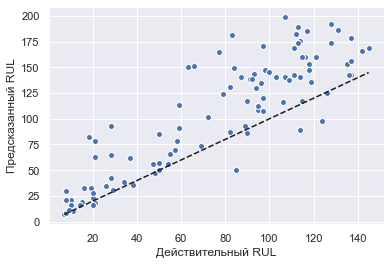

In [311]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(1, 1, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
ax.set_xlabel('Действительный RUL')
ax.set_ylabel('Предсказанный RUL')
plt.show()

# Тестирование: весь временной ряд

In [700]:
y_pred = []
for i in test['Unit_Number'].unique():
    un_test = test[test['Unit_Number'] == i ][X.columns]
    scaler = preprocessing.StandardScaler()
    scaler.fit(un_test)
    un_test_scale = scaler.transform(un_test)
    un_pred = grid_random_forest.predict(un_test_scale)
    y_pred.append(exponential_smoothing(un_pred, 0.03939688)[-1])

In [701]:
answer_RUL = pd.read_csv('./CMAPSSData/RUL_FD001.txt', header=None)
answer_RUL.columns = ['RUL']
y_test = answer_RUL['RUL']

In [702]:
print("Random Forest Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("Random Forest Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
print("Random Forest r-squared: ", r2_score(y_test, y_pred))

Random Forest Mean Squared Error:  809.4950846806012
Random Forest Mean Absolute Error:  23.448520671476167
Random Forest r-squared:  0.5312355462852544


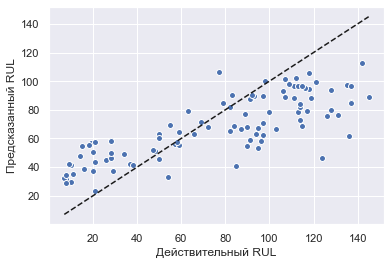

In [703]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(1, 1, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
ax.set_xlabel('Действительный RUL')
ax.set_ylabel('Предсказанный RUL')
plt.show()

In [606]:
def timeseriesCVscore(x):
    y_pred = []
    for i in test['Unit_Number'].unique():
        un_test = test[test['Unit_Number'] == i ][X.columns]
        scaler = preprocessing.StandardScaler()
        scaler.fit(un_test)
        un_test_scale = scaler.transform(un_test)
        un_pred = grid_random_forest.predict(un_test_scale)
        y_pred.append(exponential_smoothing(un_pred, x[0])[-1])
        answer_RUL = pd.read_csv('./CMAPSSData/RUL_FD001.txt', header=None)
        answer_RUL.columns = ['RUL']
        y_test = answer_RUL['RUL']
    return mean_squared_error(y_test, y_pred)

In [628]:
from scipy.optimize import minimize
x = [0] 
opt = minimize(timeseriesCVscore, x0=x, method="TNC", bounds = [(0, 1)])

In [629]:
opt.x

array([0.03939688])

# Тестирование

In [634]:
def double_exponential_smoothing(series, alpha, beta):
    result = [series[0]]
    for n in range(1, len(series)+1):
        if n == 1:
            level, trend = series[0], series[1] - series[0]
        if n >= len(series): # прогнозируем
            value = result[-1]
        else:
            value = series[n]
        last_level, level = level, alpha*value + (1-alpha)*(level+trend)
        trend = beta*(level-last_level) + (1-beta)*trend
        result.append(level+trend)
    return result

In [635]:
y_pred = []
for i in test['Unit_Number'].unique():
    un_test = test[test['Unit_Number'] == i ][X.columns]
    scaler = preprocessing.StandardScaler()
    scaler.fit(un_test)
    un_test_scale = scaler.transform(un_test)
    un_pred = grid_random_forest.predict(un_test_scale)
    y_pred.append(double_exponential_smoothing(un_pred, 0.3, 0.5)[-1])

In [636]:
answer_RUL = pd.read_csv('./CMAPSSData/RUL_FD001.txt', header=None)
answer_RUL.columns = ['RUL']
y_test = answer_RUL['RUL']

In [637]:
print("Random Forest Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("Random Forest Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
print("Random Forest r-squared: ", r2_score(y_test, y_pred))

Random Forest Mean Squared Error:  1763.0894745630371
Random Forest Mean Absolute Error:  34.75317260575551
Random Forest r-squared:  -0.02097429624277214


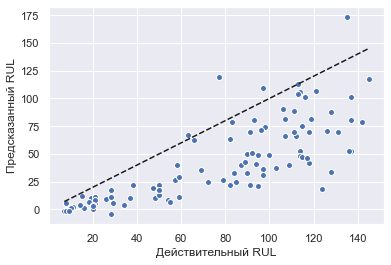

In [638]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(1, 1, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
ax.set_xlabel('Действительный RUL')
ax.set_ylabel('Предсказанный RUL')
plt.show()

In [639]:
def timeseriesCVscore(x):
    y_pred = []
    for i in test['Unit_Number'].unique():
        un_test = test[test['Unit_Number'] == i ][X.columns]
        scaler = preprocessing.StandardScaler()
        scaler.fit(un_test)
        un_test_scale = scaler.transform(un_test)
        un_pred = grid_random_forest.predict(un_test_scale)
        y_pred.append(double_exponential_smoothing(un_pred, x[0], x[1])[-1])
        answer_RUL = pd.read_csv('./CMAPSSData/RUL_FD001.txt', header=None)
        answer_RUL.columns = ['RUL']
        y_test = answer_RUL['RUL']
    return mean_squared_error(y_test, y_pred)

In [640]:
from scipy.optimize import minimize
x = [0, 0] 
opt = minimize(timeseriesCVscore, x0=x, method="TNC", bounds = ((0, 1), (0, 1)))

In [641]:
opt.x

array([0.18066703, 0.126813  ])

In [642]:
timeseriesCVscore(opt.x)

1606.008278179711

In [643]:
y_pred = []
for i in test['Unit_Number'].unique():
    un_test = test[test['Unit_Number'] == i ][X.columns]
    scaler = preprocessing.StandardScaler()
    scaler.fit(un_test)
    un_test_scale = scaler.transform(un_test)
    un_pred = grid_random_forest.predict(un_test_scale)
    y_pred.append(double_exponential_smoothing(un_pred, opt.x[0], opt.x[1])[-1])

In [644]:
print("Random Forest Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("Random Forest Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
print("Random Forest r-squared: ", r2_score(y_test, y_pred))

Random Forest Mean Squared Error:  1606.008278179711
Random Forest Mean Absolute Error:  33.73548433499742
Random Forest r-squared:  0.06998867883266269


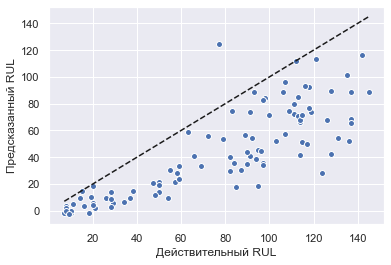

In [645]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(1, 1, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
ax.set_xlabel('Действительный RUL')
ax.set_ylabel('Предсказанный RUL')
plt.show()

# последний тест

In [699]:
test

,Unit_Number,Time_in_cycles,Operational_Setting_1,Operational_Setting_2,Operational_Setting_3,Sensor_1,Sensor_2,Sensor_3,Sensor_4,Sensor_5,...,Sensor_12,Sensor_13,Sensor_14,Sensor_15,Sensor_16,Sensor_17,Sensor_18,Sensor_19,Sensor_20,Sensor_21
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,...,520.69,2388.00,8213.28,8.4715,0.03,394,2388,100.0,38.65,23.1974
13092,100,195,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,...,521.05,2388.09,8210.85,8.4512,0.03,395,2388,100.0,38.57,23.2771
13093,100,196,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,...,521.18,2388.04,8217.24,8.4569,0.03,395,2388,100.0,38.62,23.2051
13094,100,197,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,...,521.33,2388.08,8220.48,8.4711,0.03,395,2388,100.0,38.66,23.2699


# Деление тестовой на две подвыборки для нахождения кф сглаживания

In [742]:
test_train = test[test['Unit_Number'] <= 50]

In [743]:
y_pred = []
for i in test_train['Unit_Number'].unique():
    un_test = test_train[test_train['Unit_Number'] == i ][X.columns]
    scaler = preprocessing.StandardScaler()
    scaler.fit(un_test)
    un_test_scale = scaler.transform(un_test)
    un_pred = grid_random_forest.predict(un_test_scale)
    y_pred.append(exponential_smoothing(un_pred, 0.03939688)[-1])

In [744]:
answer_RUL = pd.read_csv('./CMAPSSData/RUL_FD001.txt', header=None)
answer_RUL.columns = ['RUL']

In [745]:
y_test = answer_RUL[:50]

In [746]:
print("Random Forest Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("Random Forest Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
print("Random Forest r-squared: ", r2_score(y_test, y_pred))

Random Forest Mean Squared Error:  720.1744945655843
Random Forest Mean Absolute Error:  21.04186066312211
Random Forest r-squared:  0.5351606466274883


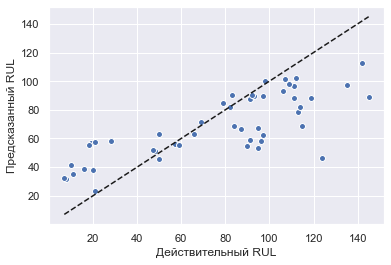

In [747]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(1, 1, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
ax.set_xlabel('Действительный RUL')
ax.set_ylabel('Предсказанный RUL')
plt.show()

In [748]:
def timeseriesCVscore(x):
    y_pred = []
    for i in test_train['Unit_Number'].unique():
        un_test = test_train[test_train['Unit_Number'] == i ][X.columns]
        scaler = preprocessing.StandardScaler()
        scaler.fit(un_test)
        un_test_scale = scaler.transform(un_test)
        un_pred = grid_random_forest.predict(un_test_scale)
        y_pred.append(exponential_smoothing(un_pred, x[0])[-1])
    answer_RUL = pd.read_csv('./CMAPSSData/RUL_FD001.txt', header=None)
    answer_RUL.columns = ['RUL']
    y_test = answer_RUL[:50]
    return mean_squared_error(y_test, y_pred)

In [749]:
from scipy.optimize import minimize
x = [0] 
opt = minimize(timeseriesCVscore, x0=x, method="TNC", bounds = [(0, 1)])

In [750]:
opt.x

array([0.0416763])

In [751]:
test_test = test[test['Unit_Number'] > 50]

In [774]:
y_pred = []
for i in test_test['Unit_Number'].unique():
    un_test = test_test[test_test['Unit_Number'] == i ][X.columns]
    scaler = preprocessing.StandardScaler()
    scaler.fit(un_test)
    un_test_scale = scaler.transform(un_test)
    un_pred = grid_random_forest.predict(un_test_scale)
    y_pred.append(exponential_smoothing(un_pred, opt.x[0])[-1])
    
answer_RUL = pd.read_csv('./CMAPSSData/RUL_FD001.txt', header=None)
answer_RUL.columns = ['RUL']
y_test = answer_RUL[50:]
print("Random Forest Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("Random Forest Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
print("Random Forest r-squared: ", r2_score(y_test, y_pred))

Random Forest Mean Squared Error:  903.4579764322577
Random Forest Mean Absolute Error:  25.695509127279273
Random Forest r-squared:  0.5255848592870924


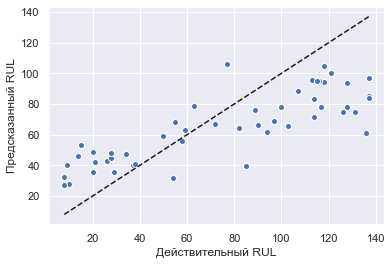

In [775]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(1, 1, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
ax.set_xlabel('Действительный RUL')
ax.set_ylabel('Предсказанный RUL')
plt.show()